# EDA Parameter extraction

## 1. Import packages and load the data 
Last time, we saved the data in pkl format that preserves the structure of python variable. 

In [6]:
import pandas as pd  
import numpy as np
from scipy.signal import find_peaks, butter, filtfilt
import matplotlib.pyplot as plt
import pickle

# File path to the pickle file
derivative_folder = '/Users/erwin/Documents/ProjectPsychophysiologyData/preprocessed-data/'
output_filename = derivative_folder + 'preprocessed_eda.pkl'

# Load the pickle file
with open(output_filename, 'rb') as f:
    loaded_data = pickle.load(f)
    
# Display the loaded data
print(loaded_data)

[{'participant': 'sub-1', 'condition': 'baseline', 'raw_data':             EDA
0       14.9753
1       14.9753
2       14.9753
3       14.9753
4       14.9753
...         ...
176995   8.9539
176996   8.9930
176997   8.9930
176998   8.9539
176999   8.9539

[177000 rows x 1 columns], 'downsampled_data':             EDA
0       14.9753
100     14.9753
200     14.9753
300     14.9753
400     14.9753
...         ...
176500   8.9930
176600   8.9930
176700   8.9930
176800   8.9930
176900   8.9539

[1770 rows x 1 columns], 'smoothed_data': 0             NaN
100           NaN
200           NaN
300           NaN
400           NaN
           ...   
176500    9.00473
176600    9.00082
176700    9.00082
176800    8.99691
176900    8.99300
Name: EDA, Length: 1770, dtype: float64}, {'participant': 'sub-1', 'condition': 'spiderhand', 'raw_data':             EDA
0       29.8724
1       29.8724
2       29.8724
3       29.8724
4       29.8724
...         ...
185245  25.2195
185246  25.1804
185247  25.180

## 2. Extract parameters

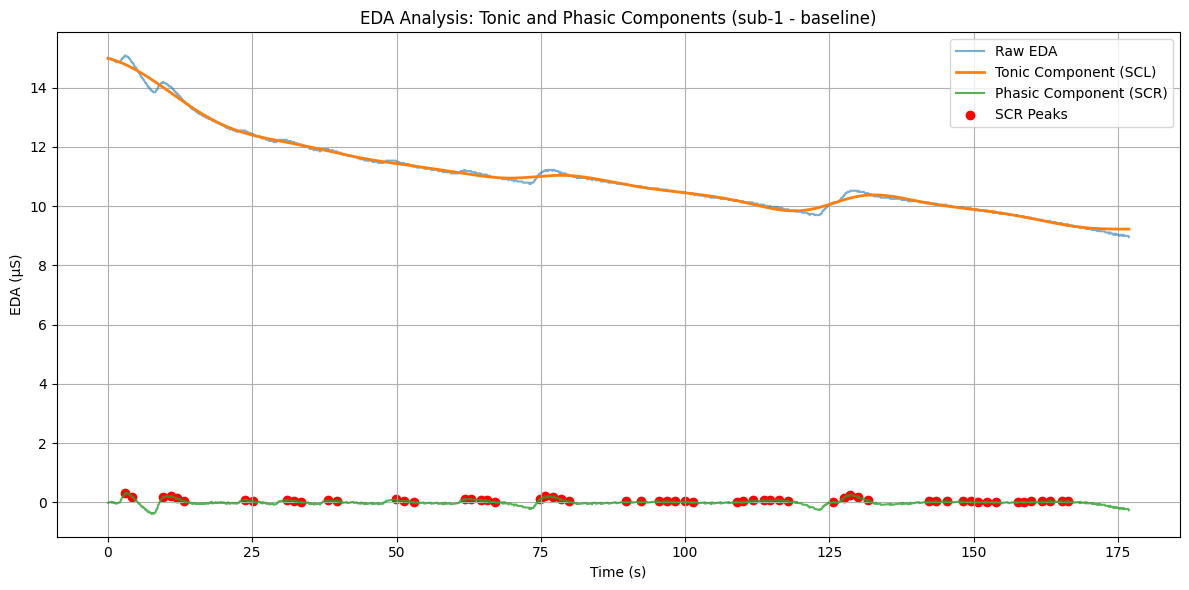

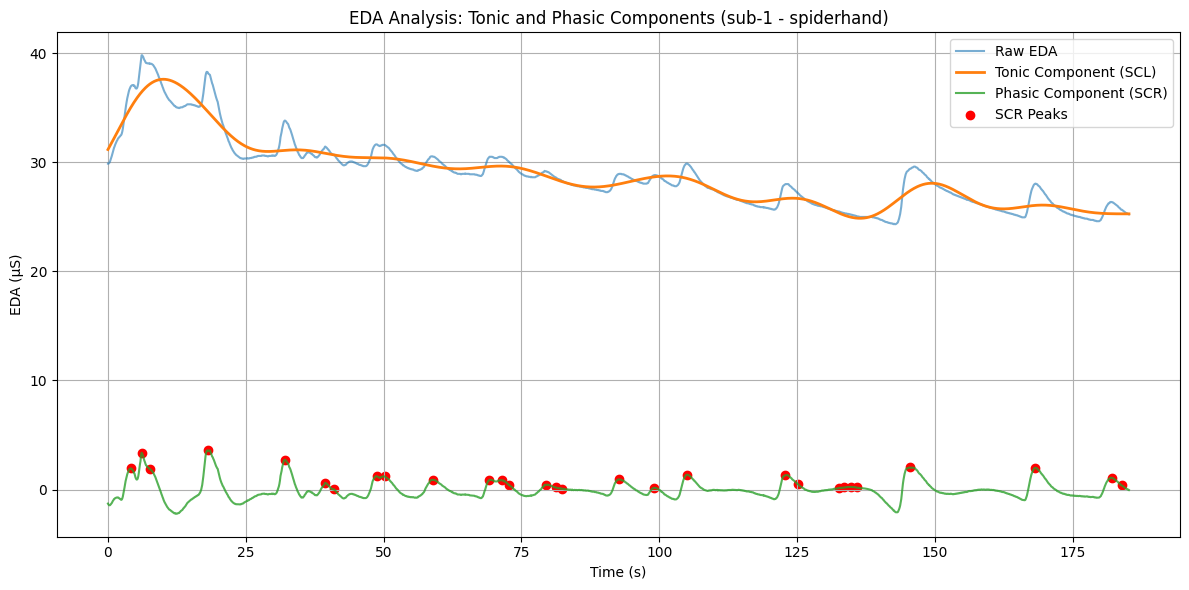

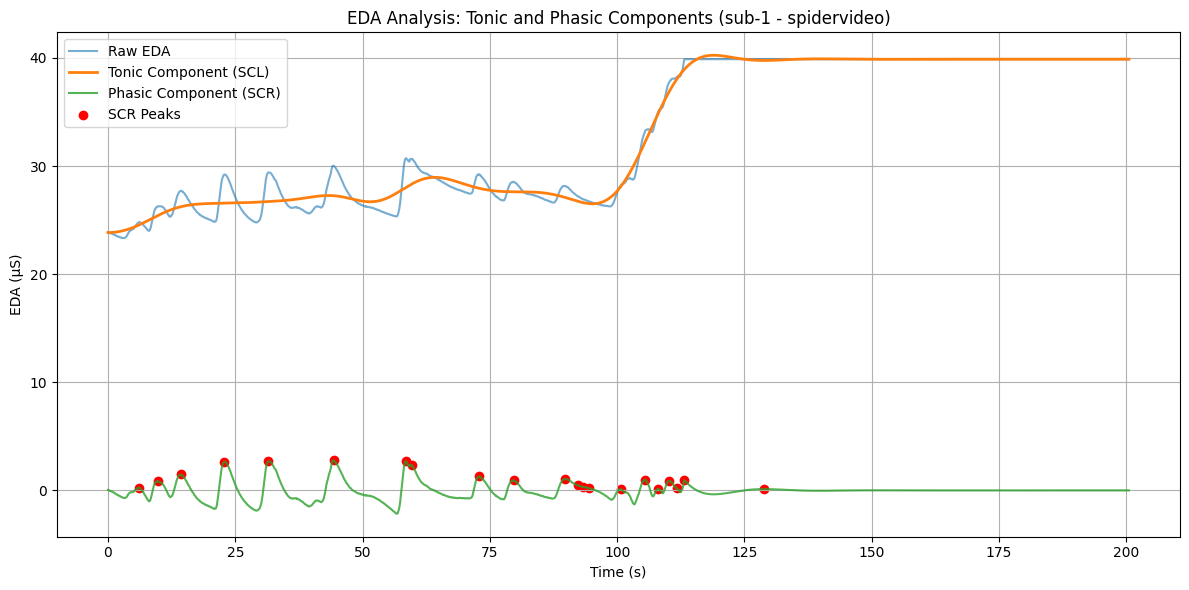

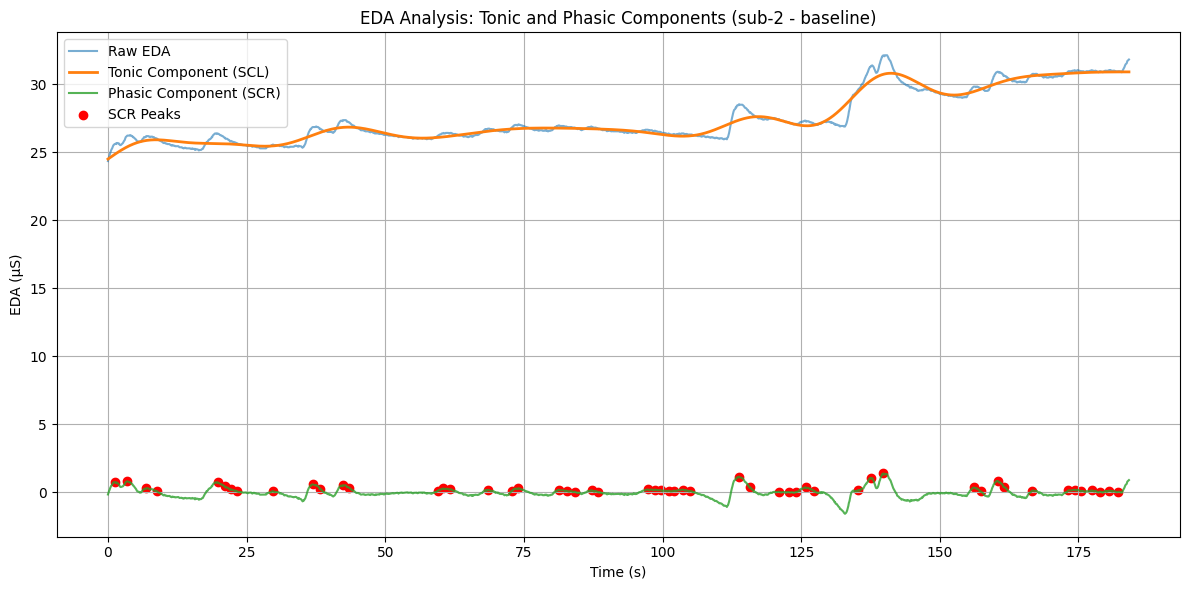

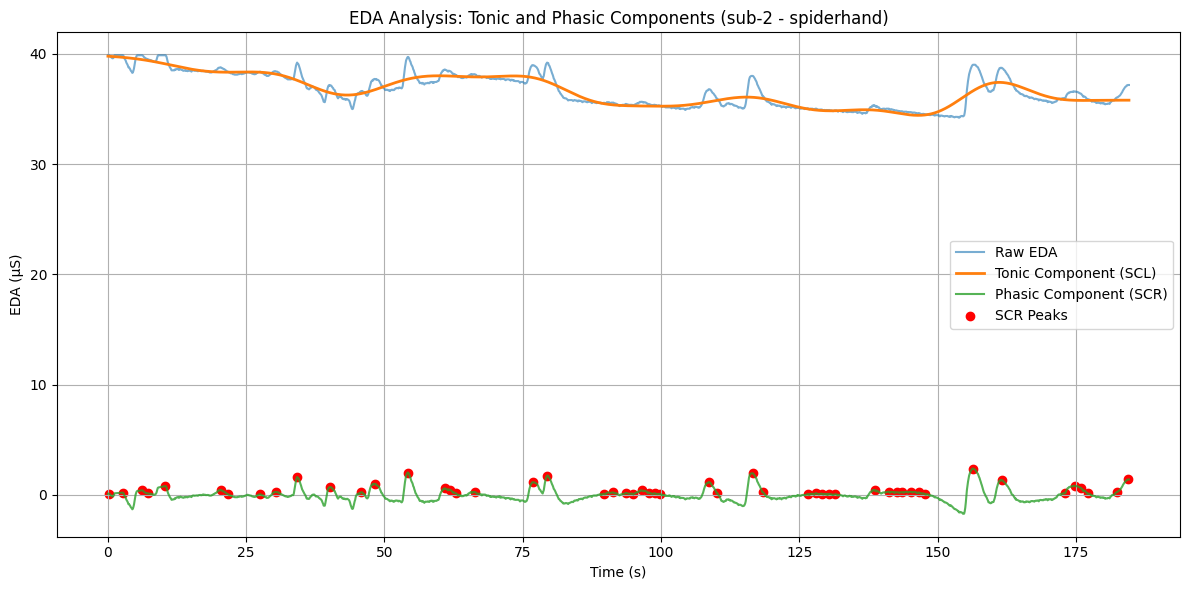

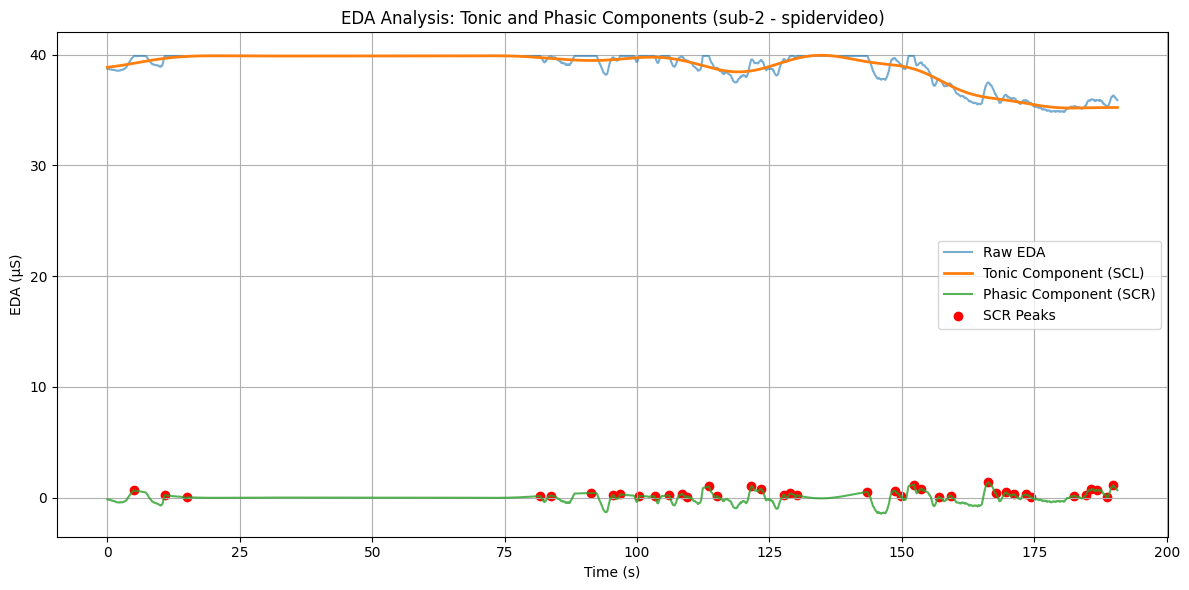

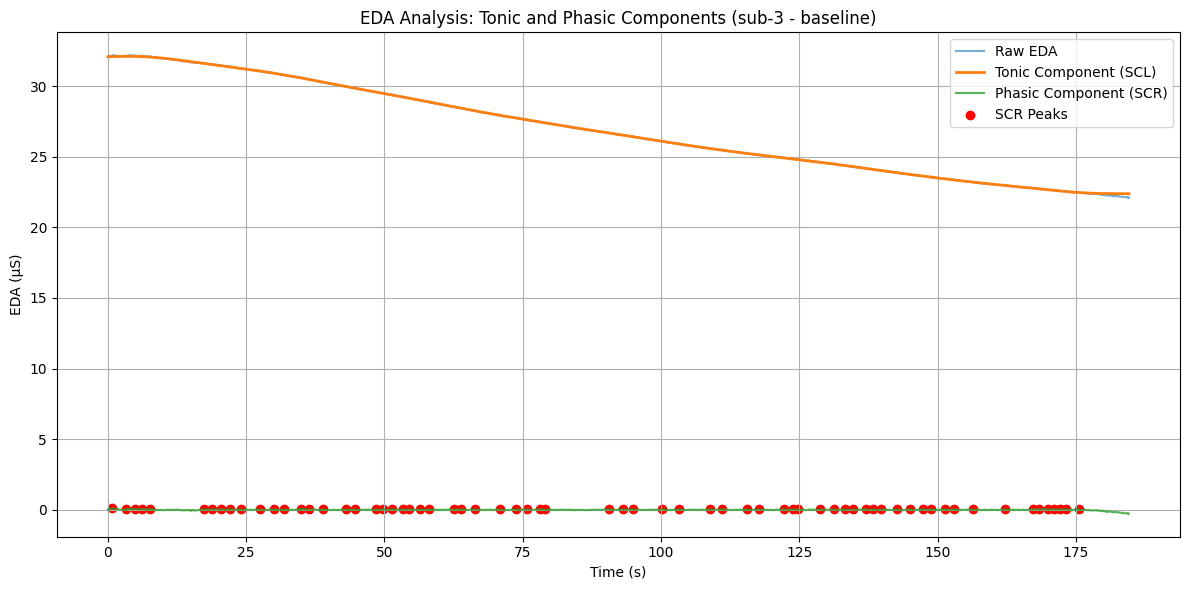

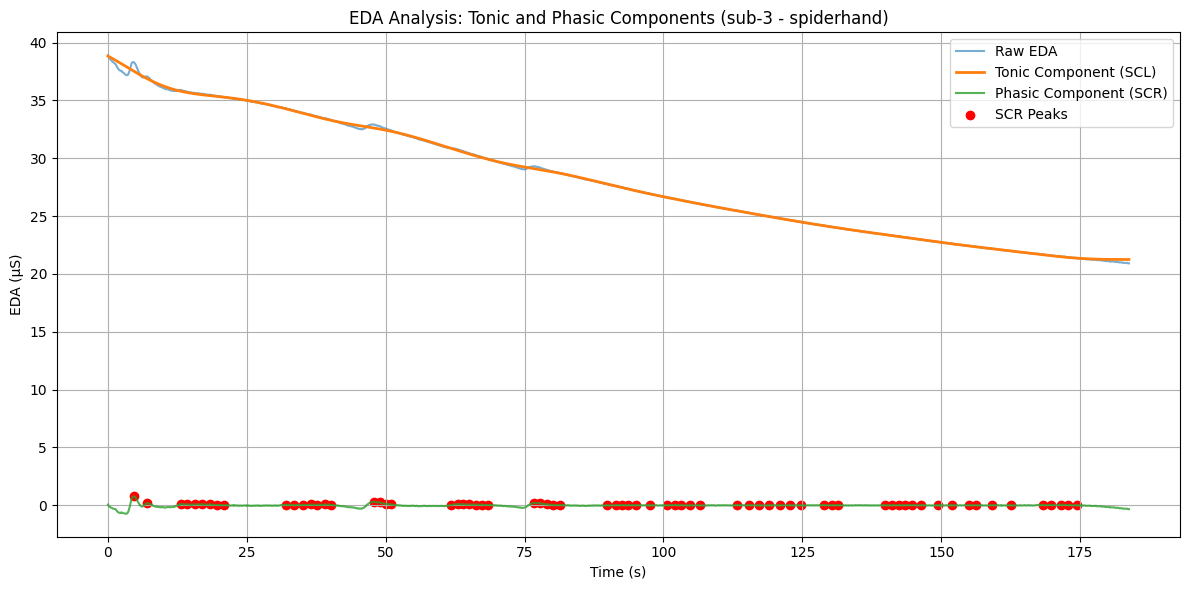

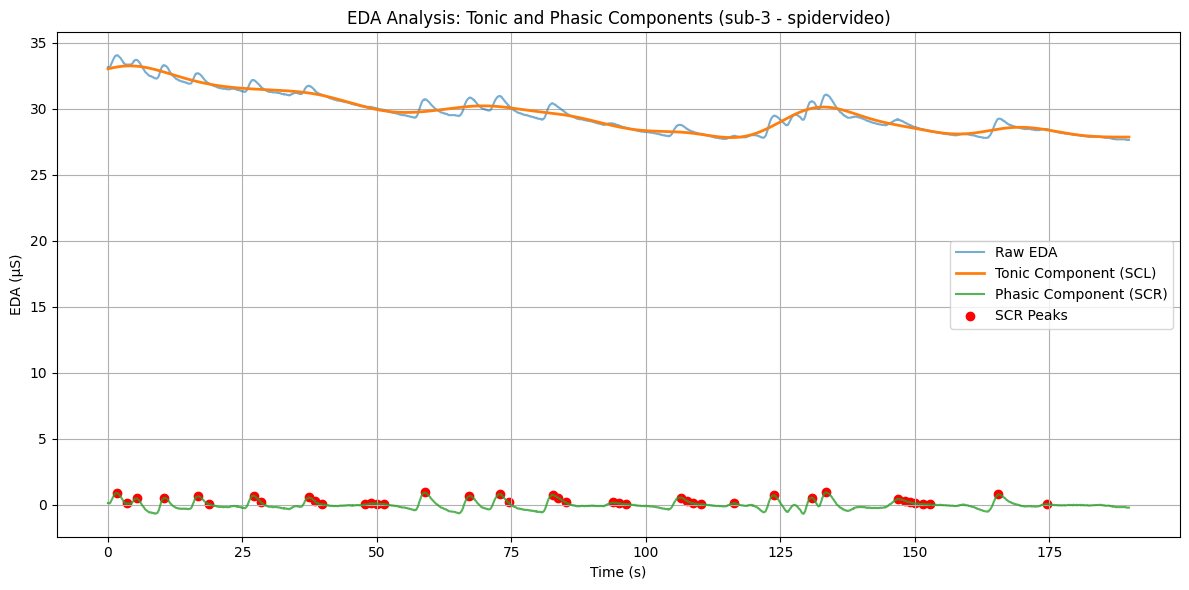

In [12]:
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.signal import butter, filtfilt, find_peaks

# Define sampling frequency (downsampled to 10 Hz)
sampling_frequency = 10  # For example

# Load the pickle file
with open(output_filename, 'rb') as f:
    loaded_data = pickle.load(f)

# 1. Extract the Tonic Component (SCL) using low-pass filtering
def low_pass_filter(data, cutoff, fs, order=4):
    nyquist = 0.5 * fs
    normal_cutoff = cutoff / nyquist
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    return filtfilt(b, a, data)

cutoff_frequency = 0.05  # Cutoff for tonic (very slow changes)

# Loop through all participant-condition pairs in the loaded data
for participant_data in loaded_data:
    # Extract participant info and condition
    participant = participant_data['participant']
    condition = participant_data['condition']
    
    # Extract the raw data (downsampled data can be used here too)
    raw_data = participant_data['downsampled_data']  # You can use raw_data or downsampled_data based on your need
    
    # Convert the raw EDA data to a numpy array
    eda_data = raw_data['EDA'].dropna().values  # Drop NaN values if any
    
    # Create a time array based on the length of the cleaned data
    time = np.arange(len(eda_data)) / sampling_frequency
    
    # Extract the tonic component using low-pass filter
    tonic_component = low_pass_filter(eda_data, cutoff_frequency, sampling_frequency)
    
    # Extract the phasic component by subtracting the tonic from the original
    phasic_component = eda_data - tonic_component
    
    # Detect SCR peaks in the phasic component
    peak_threshold = 0.02  # Threshold for detecting peaks
    peaks, _ = find_peaks(phasic_component, height=peak_threshold, distance=sampling_frequency)
    
    # Compute SCR amplitude (height of detected peaks)
    scr_amplitudes = phasic_component[peaks]
    
    # Visualize the results
    plt.figure(figsize=(12, 6))
    plt.plot(time, eda_data, label="Raw EDA", alpha=0.6)
    plt.plot(time, tonic_component, label="Tonic Component (SCL)", linewidth=2)
    plt.plot(time, phasic_component, label="Phasic Component (SCR)", alpha=0.8)
    plt.scatter(peaks / sampling_frequency, scr_amplitudes, color="red", label="SCR Peaks")
    plt.xlabel("Time (s)")
    plt.ylabel("EDA (µS)")
    plt.title(f"EDA Analysis: Tonic and Phasic Components ({participant} - {condition})")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()